# Sello rojo

libreta de análisis de los datos pertenecientes a la base de datos de la compañia Sello rojo para el año de 2017  

In [68]:
%matplotlib inline
import mysql.connector
import pandas as pd 
import numpy as np 
from gpcharts import figure
import matplotlib.pyplot as plt

In [69]:
#conección a la base de datos 
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    auth_plugin='mysql_native_password',
    passwd = "toor",
    db = "sello_rojo"
    )
print(mydb)

Con el siguiente pedazo de código podemos traer una vista que contiene toda la información de la base de datos, evidentemente es un proceso algo lento traer tal cantidad de información por lo que se opto mejor por crear las vistas dentro de la base y usarlas dentro de python para la graficación.

In [70]:
#cursor = mydb.cursor()
#cursor.execute("SELECT * FROM dbfull")
#df = pd.DataFrame(cursor)
#df.columns = ["Fecha","Cantidad_vendida","IMP_venta_bruta","ID_plaza","Depositos",
#             "Area","Estado","Zona","Clave","Clave_cliente","Num_cliente","Num_suc",
#             "Razon_social","Sucursal","Cadena","ID_producto","sku","Familia",
#             "categoria_sop"]
#df["IMP_venta_bruta"] = df["IMP_venta_bruta"].astype(float)
#df.dtypes

### Comenzamos a hacer uso de la conexión con la base

comenzamos con una gráfica que nos muestre las ventas por mes

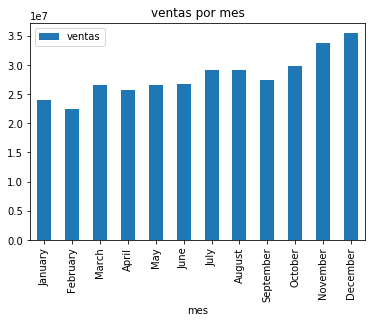

In [71]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM ventas_mes")
df = pd.DataFrame(cursor)
df.columns = ["ventas","mes"]
df["ventas"] = df["ventas"].astype(float)
#df.head
df.plot(kind="bar",x = "mes" ,title="ventas por mes")

In [6]:
#plt.figure(figsize=(7,7))
#plt.scatter(df["mes"], df["ventas"],)

gr = figure('Ventas por mes')
gr.ylabel="ventas"
gr.xlabel="meses del año 2017"
(gr.scatter(df["ventas"], trendline=True))

### Como podemos ver en la gráfica anterior la tendencia de nuestras ventas es positiva.

##### Pero sigamos viendo que más podemos descubrir, continuaremos encontrando aquellos productos que generaron mayores ventas.


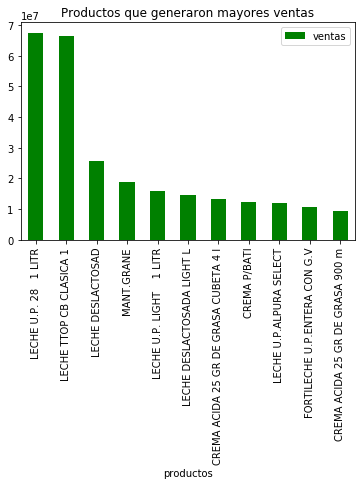

In [15]:
cursor.execute("SELECT * FROM ventas_prod")
df = pd.DataFrame(cursor)
df.columns = ["ventas","productos"]
df["ventas"] = df["ventas"].astype(float)
df.plot(kind="bar",x = "productos" ,title="Productos que generaron mayores ventas", colormap = "ocean")

##### Continuemos con el número de ventas por estado registrado

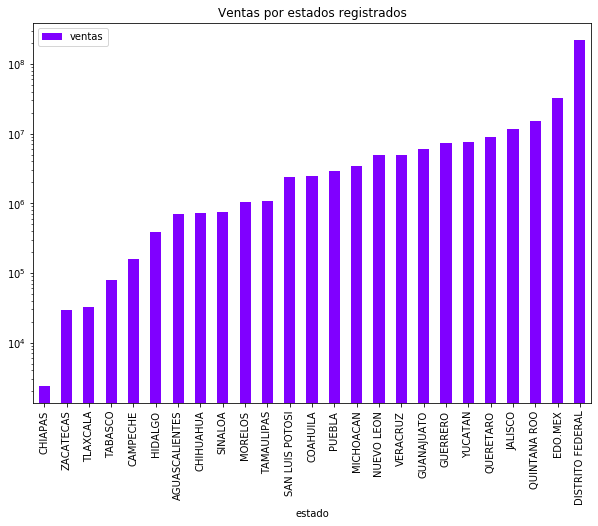

In [48]:
cursor.execute("SELECT * FROM ventas_estado")
df = pd.DataFrame(cursor)
df.columns = ["ventas","estado"]
df["ventas"] = df["ventas"].astype(float)
#df.plot.pie(y = "ventas", figsize = (15,15))
df.plot(kind="bar",x = "estado" ,title="Ventas por estados registrados", colormap = "rainbow",logy = True ,use_index = True,figsize=(10,7))


Para la gráfica anterior **tomar en cuenta que la escala** ya que va siendo modificada para poder ver todas las columnas ya que la columna del Distrito Federal se aleja mucho del resto.